# Predictive model to aid environmental impact assessments
## The development and evaluation of a model to predict the presence of amphibians using features obtained from a GIS and Satellite Images

## Table of Contents
1. [Introduction](#Introduction)
2. [Problem Definition](#Problem_Definition)
3. [Data](#Data)
4. [Problem Approach](#Problem_Approach)
5. [Data Management](#Data_Management)
6. [Model Development](#Model_Development)
7. [Comparison of Results](#Comparison_of_results)
8. [Conclusion and Recommendations](#Conclusion_and_Recommendations)

<a id='Introduction'></a>

## Introduction

An environmental impact assessment (EIA) is one of the tools being used worldwide to provide decision-makers and the concerned public with essential information to plan for environmentally sustainable economic development [1]. The goal of economic development is to invest in projects or programmes - such as the construction of mines, reservoirs, highways and housing to enhance the prosperity and quality of life of all residents. Sustainable economic development aims to find a compromise between economic development and environmental protection. 

The responsible development of spaces requires an assessment of the value of natural spaces. Spaces with low natural value can be developed as investments. <b>The presence of amphibians (frogs, toads and salamanders) in natural spaces contributes to the value of natural spaces</b>. Amphibians are a critical part of nature as both predator and prey. They eat insect pests which a is benefit to argriculture and help control mosquitos which benefits human health. They're are one of the main links in many ecosystem food webs [2]. 

Amphibians are almost entirely dependent on water for reproduction. Their eggs have no water-proof covering and their larvae (tadpoles) are quite fish like. Amphibians also tend to return to the same water reservoir where they were born to breed. They also have a land habitat on which they depend to feed, hide and survive winter. 

As part of an EIA, field work is required to estimate amphibian populations in and near water reservoirs where economic development projects are planned. Determining the contribution of amphibian populations to the value of a natural space is difficult for several reasons. In the case of road infrastructure projects, the area that needs to be assessed can be very large. Certain areas of the terrain can be difficult to reach. The number of people available to do field work can be limited. <b>An initial assessment of the natural space could help to better plan field work which should result in times and cost savings. </b>This all contributed to helping reduce the underestimation of amphibian populations and thus the valued of the natural space. 

A geographic information system (GIS) can provide information about the habitats of amphibians. A GIS integrates many different kinds of information [3]. It can include information about landscape, such as the location of stream, different kinds of vegetation, and different kinds of soil. It can also include information about the sites of factories, farms, schools and houses. [4] <b>As amphibians are highly dependant on their habitat, the assessment of their habitats using features obtained from a GIS, can potentially be used to predict their presence.</b>  

- [1] https://www.sciencedirect.com/science/article/pii/B9780444595591000189 
- [2] https://www.endangeredspeciesinternational.org/amphibians6.html
- [3] https://www.esri.com/en-us/what-is-gis/overview
- [4] https://www.nationalgeographic.org/encyclopedia/geographic-information-system-gis/#:~:text=GIS%20can%20use%20any%20information,compared%20and%20contrasted%20using%20GIS.

## The Dataset

The data used in this project can be obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Amphibians). The data was derived from GIS and sattelite images, as well as from information gathered about the size of amphibians populations that formed part of EIA reports for two planned road projects (Road A and Road B) in Poland. 

Marcin Blachnik, Marek SoÅ‚tysiak, Dominika DÄ…browska Predicting presence of amphibian species using features obtained from GIS and satellite images. ISPRS International Journal of Geo-Information 8 (3) pp. 123. MDPI. 2019

### Data Description
The data consists of 15 input variables and a <b>multi-label target</b> variable with 7 possible values indicating the presence of a certain type of frog. 

#### Attribute Information

##### Features

|            |Description                           |Type       |
|------------|--------------------------------------|-----------|
|MV          |Motorway                              |categorical|
|SR          |Surface of water reservoir (m2)       |numerical  |
|NR          |Number of water reservoirs in habitat |numerical  |
|TR          |                                      |categorical|
|VR          |                                      |categorical|
|SUR1        |                                      |categorical|
|SUR2        |                                      |categorical|
|SUR3        |                                      |categorical|
|UR          |                                      |categorical|
|FR          |                                      |categorical|
|OR          |                                      |categorical|
|RR          |                                      |ordinal    |
|BR          |                                      |ordinal    |
|MR          |                                      |categorical|
|CR          |                                      |categorical|

##### Target

|            |Description                       |
|------------|----------------------------------|
|Label 1     |The presence of Green frogs       |
|Label 2     |The presence of Brown frogs       | 
|Label 3     |The presence of Common toad       |
|Label 4     |The presence of Fire-bellied toad |
|Label 5     |The presence of Tree frog         |
|Label 6     |The presence of Common newt       |
|Label 7     |The presence of Great Crested newt|

### Problem Statement

Ideally, the estimation of amphibian populations that forms part of an environmental impact assessment should be completed in the most cost effective manner without underestimation. In reality, the field work required to estimate amphibian populations can be very difficult and time consuming as a result of the terrain conditions and the vast terrain that needs to be assessed. Underestimation can lead to an underevaluation of natural spaces where road infrastructure or other economic development projects will happen. This can have devastating consequences on the future prosperity and quality of life of all natural beings. 

An initial estimate of amphibian populations in sub-locations of the field work study area can help to better plan the area of focus for the field work teams and aid the efficient allocation of resources. <b>This project aims to create a predictive model model, trained on features obtained from publically available GIS data and satellite images, to predict the presence of different species of frogs in study area sub-locations.</b>

### Problem Approach
This is a multi-label classification problem. This is not a multi-class classification problem as the classes are not mutually exclusive. Multiple species of amphibians can be found at a site. 

Two classification algorithms will be evaluated on dataset and the quality of these models will be assessed. For each algorithm, several models will be developed and the best prediction model will be used to compare the algorithms.

### Performance Metrics

@ruanne discuss metrics that could be used to evaluate classification and multi-label classification. 

The area under the receiver operating characteristic curve (AUC) will be used to evaluate the quality of the models. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

### Exploratory Data Analysis

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

The data for both road projects is contained in a single csv file. The repository claims that there are no missing values. 

In [181]:
amphibians = pd.read_csv('amphibians.csv', sep=';', header=1, index_col='ID')
amphibians.head()

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
ID,,,,,,,,,,,,,,,,,,,,,
1,A1,600,1,1,4,6,2,10,0,0,...,0,0,1,0,0,0,0,0,0,0
2,A1,700,1,5,1,10,6,10,3,1,...,1,0,1,0,1,1,0,0,1,0
3,A1,200,1,5,1,10,6,10,3,4,...,1,0,1,0,1,1,0,0,1,0
4,A1,300,1,5,0,6,10,2,3,4,...,0,0,1,0,0,1,0,0,0,0
5,A1,600,2,1,4,10,2,6,0,0,...,5,0,1,0,1,1,1,0,1,1


In [182]:
amphibians.dtypes

Motorway              object
SR                     int64
NR                     int64
TR                     int64
VR                     int64
SUR1                   int64
SUR2                   int64
SUR3                   int64
UR                     int64
FR                     int64
OR                     int64
RR                     int64
BR                     int64
MR                     int64
CR                     int64
Green frogs            int64
Brown frogs            int64
Common toad            int64
Fire-bellied toad      int64
Tree frog              int64
Common newt            int64
Great crested newt     int64
dtype: object

In [183]:
# Check for missing values
amphibians.isna().sum()

Motorway              0
SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64

In [184]:
# Determine the number of observations in the dataset
amphibians.shape

(189, 22)

The dataset is quite small with only a 189 observations. A small dataset increases the risk of overfitting. 

The dataset will be split into train and test set. The train set will be further split into a train and validation set. 

In [185]:
# View the number of frogs per species
species = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']
species_count = amphibians[species].sum().to_frame('count').reset_index()
# Group the values according to the motorway to determine if their are any differences between the two motorways
species_count_motorway = amphibians.groupby('Motorway')[species].apply(lambda x : x.astype(int).sum())

In [186]:
species_count.columns = ['species', 'count']
species_count = species_count.sort_values('count')
species_count

,species,count
6,Great crested newt,21
3,Fire-bellied toad,58
5,Common newt,58
4,Tree frog,71
0,Green frogs,108
2,Common toad,124
1,Brown frogs,148


Text(0.5, 1.0, 'The total number of occurences per species')

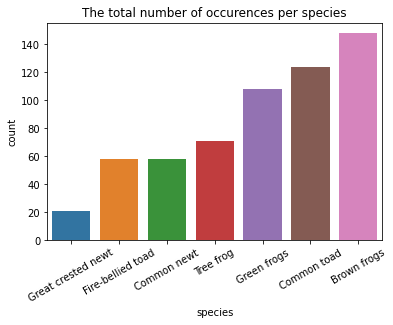

In [187]:
sns.barplot(data=species_count, x='species', y='count')
plt.xticks(rotation=30)
plt.title('The total number of occurences per species')

This figure shows the total number of occurences per species. Brown frogs were present in 148 of the sites observed, followed by common toads and green frogs. The Great Crested Newt was present at only 21 of the 189 sites observed. 

This a form of an unbalanced classification problem because some of the classes are underrepresented. 

In [188]:
species_count_motorway.reset_index(inplace=True)
species_count_motorway

,Motorway,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,A1,39,50,49,17,23,13,5
1,S52,69,98,75,41,48,45,16


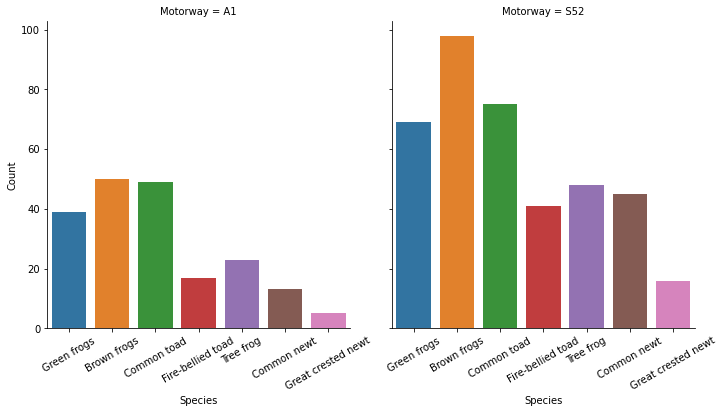

In [189]:
g = sns.catplot(data=species_count_motorway, kind='bar', col='Motorway')
g.set_xticklabels(rotation=30)
g.set_axis_labels("Species", "Count")

The figure above shows that is no real difference between the motorways where the data was collected. The relatively rarer species are Common toads, Fire-bellied toad, Tree frog, Common Newt and Great crested newts. 

In [190]:
# Are there any observations with no species present?
frogs_per_observation = amphibians[species].sum(axis=1).to_frame('species_present')
frogs_per_observation[frogs_per_observation['species_present'] == 0]

,species_present
ID,
1,0
6,0
125,0
129,0
132,0
179,0


There are 6 observations where there were no observations any species of amphibians

In [191]:
# Check whether the data is ordered by splitting the data in half and comparing the locations where the data came from
first_half, second_half = train_test_split(amphibians, test_size=0.5, random_state=42)

Text(0.5, 1.0, 'Second Half of Data')

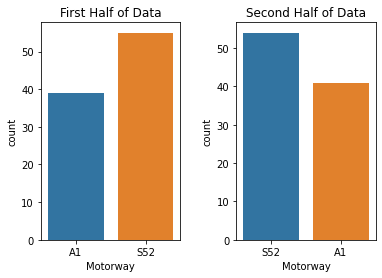

In [192]:
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.countplot(ax=ax[0],data=first_half, x='Motorway')
sns.countplot(ax=ax[1],data=second_half, x='Motorway')
ax[0].set_title('First Half of Data')
ax[1].set_title('Second Half of Data')

The observations are organized according to the location from where the data was collected (Motorway A1 or S52). We will need to shuffle the data before splitting it so that the model works well for any motorway. 

Note: Need to revisit this split to check if the labels are equally distributed between sets

### Exploration of the categorical variables

#### TR - Type of water reservoirs

According to the dictionary, there 10 unique values for this variable

In [193]:
amphibians['TR'].value_counts().sort_index()

1     116
2       4
5      12
7       1
11      4
12     23
14     10
15     19
Name: TR, dtype: int64

In [194]:
amphibians.groupby('Motorway')['TR'].value_counts().sort_index()

Motorway  TR
A1        1     48
          2      3
          5      9
          11     4
          12    12
          14     3
          15     1
S52       1     68
          2      1
          5      3
          7      1
          12    11
          14     7
          15    18
Name: TR, dtype: int64

#### SUR1 - Surroundings 1

According to the dictionary, there 9 unique values for this variable

In [195]:
amphibians['SUR1'].value_counts().sort_index()

1     43
2     70
4      1
6     19
7     20
9      5
10    30
14     1
Name: SUR1, dtype: int64

There are levels of this category that are missing. 

### SUR2 - Surroundings 2¶

According to the dictionary, there 9 unique values for this variable

In [196]:
amphibians['SUR2'].value_counts().sort_index()

1     36
2     41
6     39
7     18
9     10
10    44
11     1
Name: SUR2, dtype: int64

There are levels of this category that are missing. 

### SUR3 - Surroundings 3¶

According to the dictionary, there 9 unique values for this variable

In [197]:
amphibians['SUR3'].value_counts().sort_index()

1     29
2     29
5      2
6     55
7     18
9     10
10    45
11     1
Name: SUR3, dtype: int64

### CR - Type of shore

In [198]:
amphibians['CR'].value_counts().sort_index()

1    186
2      3
Name: CR, dtype: int64

There are only 3 observations where the shore is concrete. Could it be strong feature for there won't be any amphibians? Or not informative at all?

### VR - Intensity of vegetation development

According to the dictionary, there should be 5 unique values for this variable

In [199]:
amphibians['VR'].value_counts().sort_index()

0    30
1    55
2    35
3    41
4    28
Name: VR, dtype: int64

All the levels of the variable appear in the dataset

### MR - Maintenance status of the reservoir

According to the dictionary, there should be 3 unique values for this variable

Comment: Trash caused devastation of the reservoir ecosystem. Backfiling and leveling of water reservoirs with ground and debris should also be considered

In [200]:
amphibians['MR'].value_counts().sort_index()

0    184
1      1
2      4
Name: MR, dtype: int64

My gut says this feature won't be informative. 

### FR - The presence of fishing

According to the dictionary, there should be 3 unique values for this variable

In [201]:
amphibians['FR'].value_counts().sort_index()

0    125
1     16
2     15
3     18
4     15
Name: FR, dtype: int64

There 5 levels of this variable in the dictionary. Check if data was collected differently for the two roads?

In [202]:
amphibians['BR'].value_counts().sort_index()

0     39
1     62
2     29
5     46
9      7
10     6
Name: BR, dtype: int64

The BR or Building development variable indicated the minimum distance from a water reservoir to roads. 
The options according to the data dictionary are:
<ol>
    <li> less than 50 m </li>
    <li> 50-100 m </li>
    <li> 100-200 m </li>
    <li> 200-500 m </li>
    <li> 500-1000 m </li>
    <li> >1000 m </li>
</ol>

In [203]:
amphibians['RR'].value_counts().sort_index()

0     47
1     50
2     39
5     42
9      7
10     4
Name: RR, dtype: int64

The RR or Road variable indicated the minimum distance from a water reservoir to roads. 
The options according to the data dictionary are:
<ol>
    <li> less than 50 m </li>
    <li> 50-100 m </li>
    <li> 100-200 m </li>
    <li> 200-500 m </li>
    <li> 500-1000 m </li>
    <li> >1000 m </li>
</ol>

The values of the two ordinal variables does not correspond to the descriptions of the variables but there are also 6 unique values. 

### OR - Access from water table to land habitats

According to the dictionary, there should be 4 unique values for this variable

In [204]:
amphibians['OR'].value_counts().sort_index()

25       7
50      16
75      22
80       1
99       2
100    141
Name: OR, dtype: int64

In [205]:
# Drop the Motorway column from the dataset as this is not used 
amphibians = amphibians.drop(columns='Motorway')

In [206]:
# Split the data into features and target
amphibians_feat = amphibians.drop(species, axis=1)

In [207]:
cat_feat_list = ['TR', 'SUR1', 'SUR2', 'SUR3', 'CR', 'VR', 'MR', 'UR', 'FR', 'BR', 'RR', 'OR']

In [208]:
amphibians_feat[cat_feat_list] = amphibians_feat[cat_feat_list].astype('category')

In [209]:
amphibians_feat.dtypes

SR         int64
NR         int64
TR      category
VR      category
SUR1    category
SUR2    category
SUR3    category
UR      category
FR      category
OR      category
RR      category
BR      category
MR      category
CR      category
dtype: object

## Exploratory Data Analysis Summary

## Model Development

In [210]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

### Overfitting strategy

The original dataset is split into a train and test set. 

In [211]:
# Shuffle and split the data into train, test and validations sets
X_train, X_test, y_train, y_test = train_test_split(amphibians_feat, amphibians[species], test_size=0.20, random_state=42, shuffle=True)

### Preprocessing

The categorical columns are converted using one hot encoding

In [212]:
one_hot_encoder = make_column_transformer((OneHotEncoder(sparse=False, handle_unknown='ignore'),
     make_column_selector(dtype_include='category')),
    remainder='passthrough')

### Ramdom Forest (RF) Classifier

In [213]:
rf = Pipeline(steps=[('one_hot_encoder', one_hot_encoder), ('classifier', RandomForestClassifier(random_state=42))])

#### RF Hyperparamerter Tuning

In [214]:
param_grid = {'classifier__n_estimators': [5, 10, 15, 20, 30, 40],
              'classifier__max_features': ['auto', 'sqrt', 'log2'],
              'classifier__max_depth' : [4,5,6,7,8],
              'classifier__criterion' :['gini', 'entropy']}

In [215]:
gridsearch_rf = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

In [216]:
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('one_hot_encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe888681ca0>)])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [4, 5, 6, 7, 8],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                  

In [217]:
gridsearch_rf.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 40}

In [218]:
gridsearch_rf.best_score_

0.667467282741627

In [219]:
y_pred_rf = gridsearch.predict_proba(X_test)

In [220]:
y_pred_rf = np.transpose([pred[:, 1] for pred in y_pred_rf])

In [221]:
# AUC scores for the classes

auc_scores_classes_rf = roc_auc_score(y_test, y_pred_rf, average=None)
auc_scores_classes_rf

array([0.78991597, 0.55833333, 0.54492754, 0.68199234, 0.69318182,
       0.68484848, 0.72972973])

In [238]:
# Unweighted mean AUC

auc_scores_macro_rf = roc_auc_score(y_test, y_pred_rf, average='macro')
auc_scores_macro_rf

0.6689898865537938

The RF classifier achieves an unweighted average AUC of 0.669 on the test data.

### Gradient Boosting Tree (GBT) Classifier

A GBT classifier will be trained for each class or label. The outputs from individual GBT classifiers are combined to produce a multi-label output. 

In [223]:
# Define a pipeline to convert the categorical variables using one hot encoding
gbt = Pipeline(steps=[('one_hot_encoder', one_hot_encoder), ('classifier', MultiOutputClassifier(GradientBoostingClassifier(random_state=42)))])

#### GBT Hyperparamerter Tuning

In [224]:
param_grid_gbt = {'classifier__estimator__n_estimators': [5, 10, 15, 20, 30, 40]}

In [225]:
gridsearch_gbt = GridSearchCV(gbt, param_grid_gbt, cv=5, scoring='roc_auc', return_train_score=True)

In [226]:
gridsearch_gbt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('one_hot_encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe888681ca0>)])),
                                       ('classifier',
                                        MultiOutputClassifier(estimator=GradientBoostingClassifier(random_state=42)))]),
             param_grid={'classifier__estimator__n_estimators': [5, 10, 15, 20,
                                                                 30, 40]},
             return_train_score=True, scori

In [227]:
gridsearch_gbt.best_params_

{'classifier__estimator__n_estimators': 40}

In [228]:
gridsearch_gbt.best_score_

0.6215602305803406

In [229]:
y_pred_gbt = gbt_gridsearch.predict_proba(X_test)

In [230]:
y_pred_gbt = np.transpose([pred[:, 1] for pred in y_pred_gbt])

In [231]:
# AUC scores for the classes

auc_scores_classes_gbt = roc_auc_score(y_test, y_pred_gbt, average=None)
auc_scores_classes_gbt

array([0.72268908, 0.43333333, 0.61304348, 0.61685824, 0.67613636,
       0.70909091, 0.83783784])

In [232]:
# Unweighted mean AUC

auc_scores_macro_gbt = roc_auc_score(y_test, y_pred_gbt, average='macro')
auc_scores_macro_gbt

0.6584270336196368

The GBT classifier achieves an unweighted average AUC of 0.658 on the test data. 

### Comparison of Results

In [235]:
auc_results = pd.DataFrame({'species': species, 'rf': auc_scores_classes_rf, 'gbt': auc_scores_classes_gbt})

In [236]:
auc_results

,species,rf,gbt
0,Green frogs,0.789916,0.722689
1,Brown frogs,0.558333,0.433333
2,Common toad,0.544928,0.613043
3,Fire-bellied toad,0.681992,0.616858
4,Tree frog,0.693182,0.676136
5,Common newt,0.684848,0.709091
6,Great crested newt,0.729730,0.837838


The table above shows a comparison of the AUC scores achieved by each algorithm per class. A perfect classifier would have a ROC AUC equal to 1 and a purely random classifier will have a ROC AUC equal to 0.5. The RF and GBT both perform poorly for Brown Frogs. 

In [242]:
print('Unweighted average AUC for RF:', auc_scores_macro_rf)
print('Unweighted average AUC for GBT:', auc_scores_macro_gbt)

Unweighted average AUC for RF: 0.6689898865537938
Unweighted average AUC for GBT: 0.6584270336196368


### Conclusion and Recommendations

The study shows that there is potential to develop a prediction model that makes use features extracted from publicly available GIS data and satellite images. The dataset is small and the predictive model would benefit from more training data. 

The values of the categorical variables did not always match the data dictionary and should be followed up on with the data collection team. For example, the categorical variable for the presence of fishing should have 3 levels according to the data dictionary but the variable has 5 levels in the dataset. 

### References

-[Multilabel_classification](https://scikit-learn.org/stable/modules/multiclass.html#multilabel-classification)